In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the start and end dates
start_date = '2020-01-01'
end_date = '2023-12-31'

# Download S&P 500 data using the ticker symbol '^GSPC'
data = yf.download('^GSPC', start=start_date, end=end_date)

# Resample the data to get monthly closing prices
monthly_data = data['Close'].resample('M').last()

# Create a DataFrame from the monthly data
monthly_df = pd.DataFrame(monthly_data)

# Add a month column
monthly_df['Month'] = monthly_df.index.month_name()

# Reset index to make 'Date' a column
monthly_df.reset_index(inplace=True)

# Rename columns for clarity
monthly_df.rename(columns={'Date': 'Date', 'Close': 'Monthly Close'}, inplace=True)

# Calculate absolute returns and store it in a new column 'Monthly Returns'
monthly_df['Monthly Returns'] = monthly_df['Monthly Close'].diff()

# Change NaN values in 'Monthly Returns' to 0 using fillna()
monthly_df['Monthly Returns'] = monthly_df['Monthly Returns'].fillna(0)

# Display the final DataFrame with Monthly Returns
print(monthly_df)

[*********************100%***********************]  1 of 1 completed

         Date  Monthly Close      Month  Monthly Returns
0  2020-01-31    3225.520020    January         0.000000
1  2020-02-29    2954.219971   February      -271.300049
2  2020-03-31    2584.590088      March      -369.629883
3  2020-04-30    2912.429932      April       327.839844
4  2020-05-31    3044.310059        May       131.880127
5  2020-06-30    3100.290039       June        55.979980
6  2020-07-31    3271.120117       July       170.830078
7  2020-08-31    3500.310059     August       229.189941
8  2020-09-30    3363.000000  September      -137.310059
9  2020-10-31    3269.959961    October       -93.040039
10 2020-11-30    3621.629883   November       351.669922
11 2020-12-31    3756.070068   December       134.440186
12 2021-01-31    3714.239990    January       -41.830078
13 2021-02-28    3811.149902   February        96.909912
14 2021-03-31    3972.889893      March       161.739990
15 2021-04-30    4181.169922      April       208.280029
16 2021-05-31    4204.109863   


C:\Users\anike\AppData\Local\Temp\ipykernel_1960\4065165343.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data['Close'].resample('M').last()


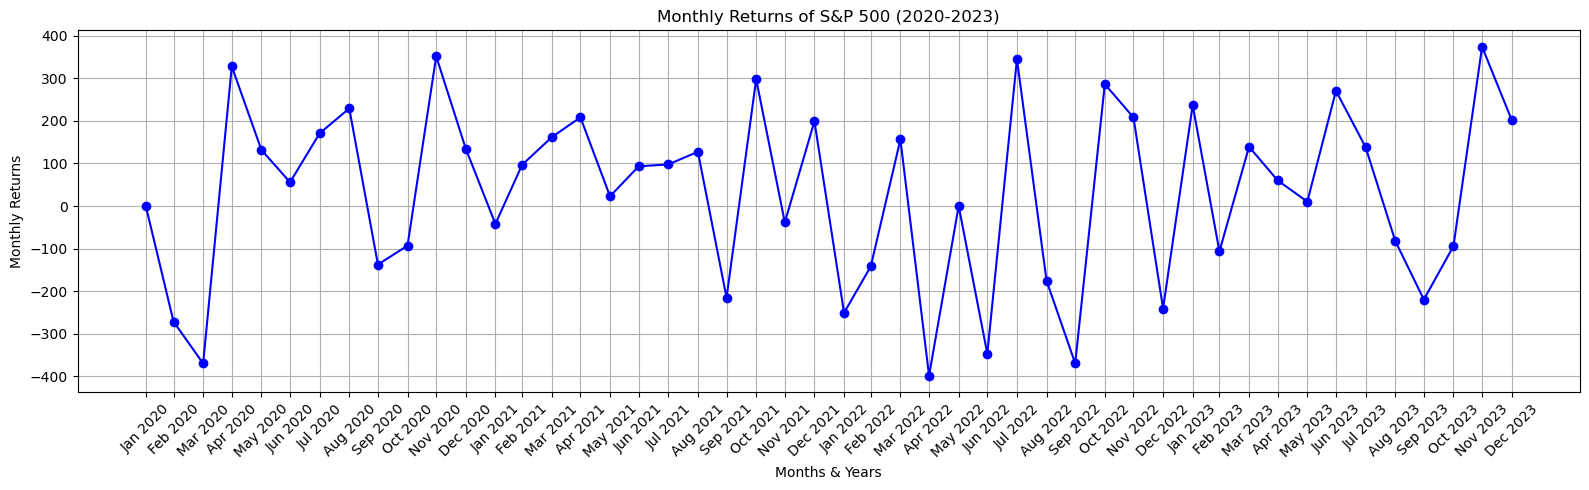

In [2]:
# Plotting Monthly Returns
plt.figure(figsize=(16, 5))
plt.plot(monthly_df['Date'], monthly_df['Monthly Returns'], marker='o', linestyle='-', color='b')

# Formatting x-axis to show month and year
plt.xticks(monthly_df['Date'], [date.strftime('%b %Y') for date in monthly_df['Date']], rotation=45)

# Adding titles and labels
plt.title('Monthly Returns of S&P 500 (2020-2023)')
plt.xlabel('Months & Years')
plt.ylabel('Monthly Returns')
plt.grid()
plt.tight_layout()

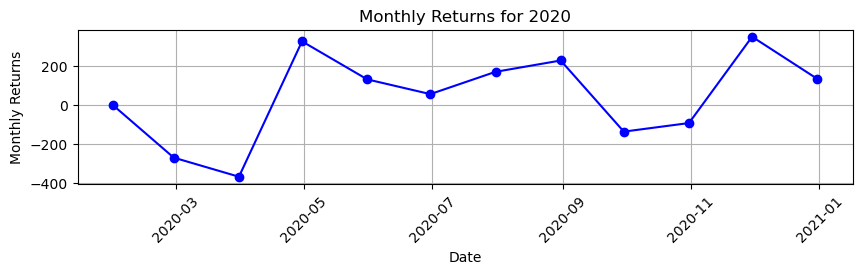

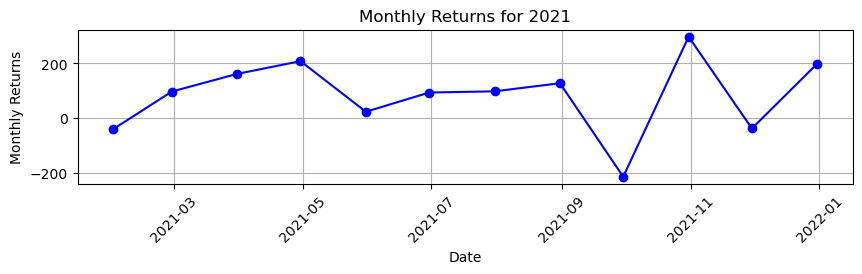

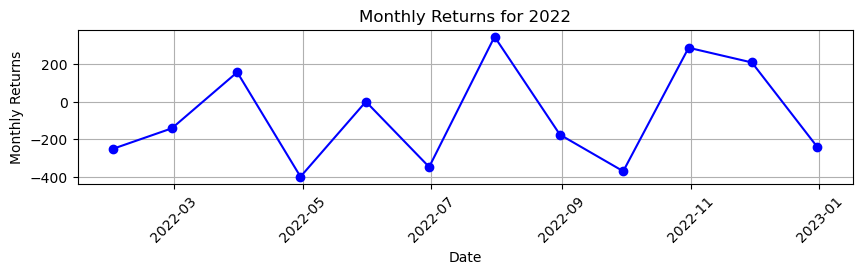

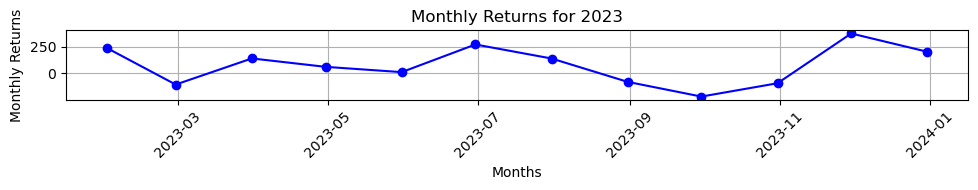

In [3]:
# Extract years for subsetting
monthly_df['Year'] = monthly_df['Date'].dt.year

# Create individual plots for each year
years = [2020, 2021, 2022, 2023]

for year in years:
    # Filter data for the specific year
    yearly_data = monthly_df[monthly_df['Year'] == year]
    
    # Plotting Monthly Returns for each year
    plt.figure(figsize=(10, 2))
    plt.plot(yearly_data['Date'], yearly_data['Monthly Returns'], marker='o', linestyle='-', color='b')
    
    # Adding titles and labels
    plt.title(f'Monthly Returns for {year}')
    plt.xlabel('Date')
    plt.ylabel('Monthly Returns')
    plt.xticks(rotation=45)
    plt.grid()
    

plt.xlabel('Months')
plt.tight_layout()
plt.show()

In [4]:
stock_data = yf.download('^GSPC', interval='1mo', start='2019-01-01', end='2023-12-31')
stock_data.reset_index(inplace=True)

# Extracting month as a number and month name from date
stock_data['Month'] = stock_data['Date'].dt.month  # Extracting month as a number
stock_data['Month_Name'] = stock_data['Date'].dt.month_name()  # Extracting month name

stock_data['Monthly Return'] = stock_data['Close'].pct_change()
stock_data = stock_data.dropna()
stock_data

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume,Month,Month_Name,Monthly Return
1,2019-02-01,2702.320068,2813.489990,2681.830078,2784.489990,2784.489990,70638770000,2,February,0.029729
2,2019-03-01,2798.219971,2860.310059,2722.270020,2834.399902,2834.399902,79159660000,3,March,0.017924
3,2019-04-01,2848.629883,2949.520020,2848.629883,2945.830078,2945.830078,70090370000,4,April,0.039313
4,2019-05-01,2952.330078,2954.129883,2750.520020,2752.060059,2752.060059,77250740000,5,May,-0.065778
5,2019-06-01,2751.530029,2964.149902,2728.810059,2941.760010,2941.760010,71250630000,6,June,0.068930
6,2019-07-01,2971.409912,3027.979980,2952.219971,2980.379883,2980.379883,70599470000,7,July,0.013128
7,2019-08-01,2980.320068,3013.590088,2822.120117,2926.459961,2926.459961,80269220000,8,August,-0.018092
8,2019-09-01,2909.010010,3021.989990,2891.850098,2976.739990,2976.739990,74178980000,9,September,0.017181
9,2019-10-01,2983.689941,3050.100098,2855.939941,3037.560059,3037.560059,77720640000,10,October,0.020432
10,2019-11-01,3050.719971,3154.260010,3050.719971,3140.979980,3140.979980,72410620000,11,November,0.034047


In [18]:
import numpy as np
conditions = [
    (stock_data['Monthly Return'] > 0),   # Up
    (stock_data['Monthly Return'] < 0),   # Down
    (stock_data['Monthly Return'] == 0)    # Stable
]
choices = ['Up', 'Down', 'Stable']
stock_data['State'] = np.select(conditions, choices)

# Step 4: Create Transition Matrices for Each Month
monthly_transition_matrices = {}

for month in range(1, 13):  # Loop through each month (1 to 12)
    # Filter data for the specific month across all years
    monthly_data = stock_data[stock_data['Date'].dt.month == month]
    
    if len(monthly_data) > 1:  # Ensure there are enough data points
        transition_matrix = pd.crosstab(monthly_data['State'].shift(), monthly_data['State'], normalize='index')
        monthly_transition_matrices[month] = transition_matrix

mean_monthly_returns = stock_data.groupby(stock_data['Date'].dt.month)['Monthly Return'].mean()

# Step 6: Display Results
print("Mean Monthly Returns:")
print(mean_monthly_returns)

print("\nMonthly Transition Matrices:")
for month, matrix in monthly_transition_matrices.items():
    print(f"\nTransition Matrix for Month {month}:")
    print(matrix)

Mean Monthly Returns:
Date
1    -0.000899
2    -0.017153
3     0.001214
4     0.029054
5    -0.002495
6     0.018068
7     0.042647
8     0.004161
9    -0.042346
10    0.023959
11    0.055238
12    0.018916
Name: Monthly Return, dtype: float64

Monthly Transition Matrices:

Transition Matrix for Month 1:
State      Down        Up
State                    
Down   0.666667  0.333333

Transition Matrix for Month 2:
State  Down   Up
State           
Down    0.5  0.5
Up      1.0  0.0

Transition Matrix for Month 3:
State      Down        Up
State                    
Down   0.000000  1.000000
Up     0.333333  0.666667

Transition Matrix for Month 4:
State      Down        Up
State                    
Down   0.000000  1.000000
Up     0.333333  0.666667

Transition Matrix for Month 5:
State   Up
State     
Down   1.0
Up     1.0

Transition Matrix for Month 6:
State      Down        Up
State                    
Down   0.000000  1.000000
Up     0.333333  0.666667

Transition Matrix for Month 7:


C:\Users\anike\AppData\Local\Temp\ipykernel_1960\1039638017.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['State'] = np.select(conditions, choices)


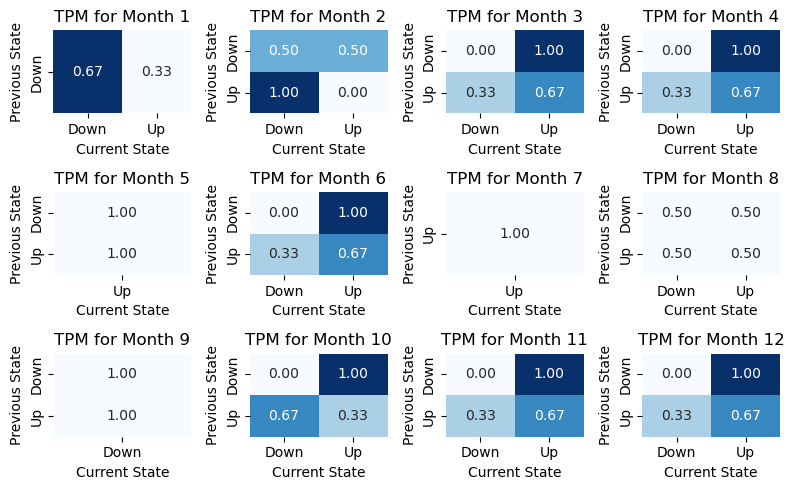

In [20]:
import seaborn as sns
# Plotting Transition Probability Matrices as Heatmaps
plt.figure(figsize=(8, 5))

for i, (month, matrix) in enumerate(monthly_transition_matrices.items(), start=1):
    plt.subplot(3, 4, i)  # Create a grid of subplots (3 rows, 4 columns)
    sns.heatmap(matrix, annot=True, fmt=".2f", cmap='Blues', cbar=False,
                xticklabels=matrix.columns, yticklabels=matrix.index)
    
    plt.title(f'TPM for Month {month}')
    plt.xlabel('Current State')
    plt.ylabel('Previous State')

plt.tight_layout()
plt.show()

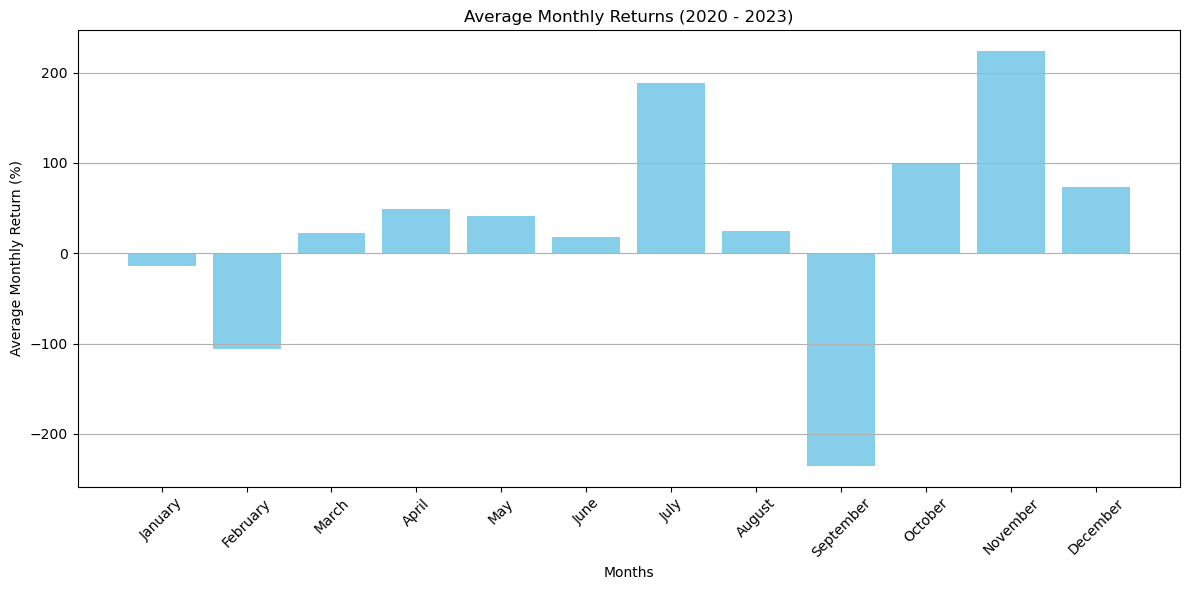

In [7]:
# Extract years and months for subsetting
monthly_df['Year'] = monthly_df['Date'].dt.year
monthly_df['Month'] = monthly_df['Date'].dt.month

# Calculate average monthly returns across the years
mean_monthly_returns = monthly_df.groupby('Month')['Monthly Returns'].mean()

# Extract month names for labeling the x-axis
month_names = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]

# Create a bar plot comparing the average monthly returns for each month across the years
plt.figure(figsize=(12, 6))
plt.bar(month_names, mean_monthly_returns, color='skyblue')
plt.title('Average Monthly Returns (2020 - 2023)')
plt.xlabel('Months')
plt.ylabel('Average Monthly Return (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()